# 3.4 Ein Einfaches Neuronales Netz

In [20]:
import random
import os.path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

In [21]:
# Generate random hash
hash = random.getrandbits(16)
print("Hash: ", hash)

Hash:  33918


In [22]:
# Lade den Iris-Datenset
data_train = pd.read_csv('./input/iris.csv')

In [23]:
# Die 3 zu erkennenden Klassifikationsklassen werden zu numerischen Werten 0, 1 bzw. 2 umgewandelt.
data_train.loc[data_train['species']=='Iris-setosa', 'species']=0
data_train.loc[data_train['species']=='Iris-versicolor', 'species']=1
data_train.loc[data_train['species']=='Iris-virginica', 'species']=2
data_train = data_train.apply(pd.to_numeric)

In [24]:
# Der eingelesene Datenset wird als Matrix dargestellt
data_train_array = data_train.values # oder data_train.to_numpy()

In [25]:
# Zur Sicherstellung der Reproduzierbarkeit der Ergebnisse setzen wir random.seed auf eine festen Wert, z.B. 42
np.random.seed(17)

Das Datenset wird in zwei separate Kategorie gespaltet: Testdaten und Trainingsdaten. 

80% der Daten werden zum Trainieren und 20% zum Testen des Modells verwendet. 

Da es sich bei der Eingabe um einen Vektor handelt, werden wird den Großbuchstaben X benutzen.

Für die Ausgabe hingegen handelt es sich um ein einzelner Werte, 
daher die Bezeichung mit dem Kleinbuchstaben y.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data_train_array[:,:4],
                                                    data_train_array[:,4],
                                                    test_size=0.2)

### Version 1
Ein neuronales Netz zur Klassifikation (MultiLayerPerceptron) wird mit folgenden Eigenschaften gebildet:
- einem Input-Layer mit 4 Neuronen, die die Merkmale der Iris-Planze repräsentieren
- einem Hidden-Layer mit 10 Neuronen
- einem Output-Layer mit 3 Neuronen, die die zu erkennenden Klassen repräsentieren

Dabei wird als Aktivierungsfunktion relu und als Optimierer adam verwenden.

<img src="img/network_01.png" height="400"/>

In [27]:
#mlp = MLPClassifier(hidden_layer_sizes=(10,),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)

### Version 2
Erstelle eine zweite Version des neuronalen Netzes mit folgenden Eigenschaften:
- einem Input-Layer mit 4 Neuronen, die die Merkmale der Iris-Planze repräsentieren
- zwei Hidden-Layer mit jeweils 3 und 5 Neuronen
- einem Output-Layer mit 3 Neuronen, die die zu erkennenden Klassen repräsentieren

Füge die Zweite Version direkt unter der Ersten ein. Und führe die neu Zelle und alle folgenden aus.

<img src="img/network_02.png" height="400"/>

In [28]:
# Zweite Version:
mlp = MLPClassifier(hidden_layer_sizes=(5,5),activation='relu', solver='adam', max_iter=350, batch_size=10, verbose=True)

In [29]:
# Das neuronale Netz wird mit den Trainingsdaten traniert
mlp.fit(X_train, y_train)

Iteration 1, loss = 4.61322024
Iteration 2, loss = 3.96999130
Iteration 3, loss = 3.46609256
Iteration 4, loss = 3.05074659
Iteration 5, loss = 2.68715213
Iteration 6, loss = 2.36526872
Iteration 7, loss = 2.10490058
Iteration 8, loss = 1.88388378
Iteration 9, loss = 1.70005718
Iteration 10, loss = 1.53747357
Iteration 11, loss = 1.38634665
Iteration 12, loss = 1.26373454
Iteration 13, loss = 1.15350769
Iteration 14, loss = 1.05534227
Iteration 15, loss = 0.96766113
Iteration 16, loss = 0.90694030
Iteration 17, loss = 0.86937831
Iteration 18, loss = 0.84440678
Iteration 19, loss = 0.82266434
Iteration 20, loss = 0.80347524
Iteration 21, loss = 0.78536554
Iteration 22, loss = 0.77001276
Iteration 23, loss = 0.75557412
Iteration 24, loss = 0.74055971
Iteration 25, loss = 0.72887897
Iteration 26, loss = 0.71636352
Iteration 27, loss = 0.70480566
Iteration 28, loss = 0.69453821
Iteration 29, loss = 0.68443857
Iteration 30, loss = 0.67505473
Iteration 31, loss = 0.66582438
Iteration 32, los

Iteration 83, loss = 0.46445463
Iteration 84, loss = 0.46324425
Iteration 85, loss = 0.46196541
Iteration 86, loss = 0.46064934
Iteration 87, loss = 0.45939069
Iteration 88, loss = 0.45845579
Iteration 89, loss = 0.45714615
Iteration 90, loss = 0.45606127
Iteration 91, loss = 0.45543284
Iteration 92, loss = 0.45430488
Iteration 93, loss = 0.45285273
Iteration 94, loss = 0.45198646
Iteration 95, loss = 0.45091480
Iteration 96, loss = 0.44993477
Iteration 97, loss = 0.44913352
Iteration 98, loss = 0.44817431
Iteration 99, loss = 0.44723040
Iteration 100, loss = 0.44648137
Iteration 101, loss = 0.44550993
Iteration 102, loss = 0.44491669
Iteration 103, loss = 0.44429945
Iteration 104, loss = 0.44309980
Iteration 105, loss = 0.44251133
Iteration 106, loss = 0.44214360
Iteration 107, loss = 0.44097561
Iteration 108, loss = 0.44028579
Iteration 109, loss = 0.43924550
Iteration 110, loss = 0.43849055
Iteration 111, loss = 0.43780715
Iteration 112, loss = 0.43695813
Iteration 113, loss = 0.436

/Users/FabianFranz/Development/Projects/velpTec/Tensorflow/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=10, hidden_layer_sizes=(5, 5), max_iter=350,
              verbose=True)

In [30]:
# Das Ergebnis des Training wird ausgegeben
print("Trainingsergebnis: %5.3f" % mlp.score(X_train, y_train))

Trainingsergebnis: 0.967


In [31]:
# Das Modell wird mit den Testdatensdaten evaluiert
predictions = mlp.predict(X_test)
# und die Konfusionsmatrix ausgegeben
print(confusion_matrix(y_test,predictions))  

[[ 7  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [32]:
# Aus der Konfusionsmatrix werden precison, recall und f1-score berechnet und ausgebenen
print(classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00        11
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [33]:
# Das Modell wird getest und das Ergebnis ausgegeben
print("Testergebnis: %5.3f" % mlp.score(X_test,y_test))

Testergebnis: 1.000


In [34]:
# Folgendes gibt die Werte der Gewichte pro Layer aus
print("WEIGHTS:", mlp.coefs_)
print("BIASES:", mlp.intercepts_) 

WEIGHTS: [array([[-2.50192399e-01,  7.30649192e-01, -1.64974991e-24,
        -2.34579155e-01,  3.35396762e-01],
       [-7.80883149e-01,  3.04546601e-01, -3.77462673e-90,
         6.64201244e-01,  4.99912617e-01],
       [ 1.21340414e+00, -3.41279551e-01, -6.32706057e-15,
        -6.90372685e-01, -9.26775873e-02],
       [ 1.20569598e+00, -6.49905302e-01,  3.61997463e-25,
         7.21314323e-01, -2.15356530e-01]]), array([[-1.45297636e+00,  2.23431925e-01,  1.36650078e+00,
        -2.15921949e-01,  6.31799580e-86],
       [ 5.74775521e-01,  2.56348220e-01, -5.25004737e-01,
         5.40111568e-01, -1.61639657e-79],
       [-5.77390469e-15,  1.67515420e-30, -4.07272939e-95,
        -1.28363116e-95,  1.26257054e-13],
       [-1.80852785e-01,  6.05279618e-01,  4.94363861e-01,
         3.49419786e-01, -2.20859691e-34],
       [ 5.65580413e-02, -8.02755303e-01, -4.01696949e-01,
        -4.79534245e-01,  5.79129562e-79]]), array([[ 1.19508973e+00, -1.34511114e+00, -5.94048127e-01],
       [

In [35]:
# Das Modell wird beispielsweise zur Vorhersage auf folgenden Werten 
# aus dem Testset angewandt mit den Merkmalen [sepal-length, sepal-width, 
# petal-length, petal-width]
print(mlp.predict([[5.1,3.5,1.4,0.2], [5.9,3.,5.1,1.8], [4.9,3.,1.4,0.2], [5.8,2.7,4.1,1.]]))

[0. 2. 0. 1.]


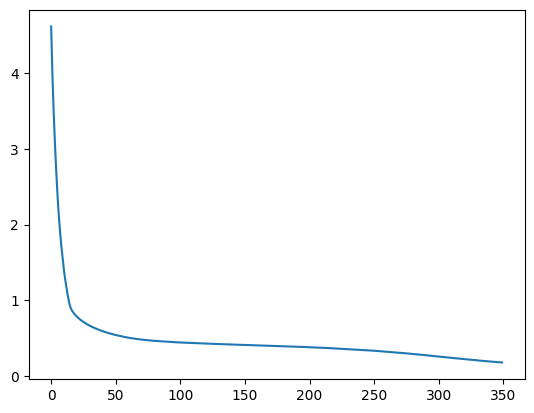

In [36]:
# Die Loss-Kurve wird visualisiert und in der Datei Plot_of_loss_values.png im PNG-Format gespeichert.
loss_values = mlp.loss_curve_
plt.plot(loss_values)
# Check, if there is already a file with the same name
# If yes, add a number to the filename
i = 0
while os.path.isfile("./output/plot_of_loss_values.png"):
    i += 1
    plt.savefig("./output/plot_of_loss_values" + str(i) + ".png")
plt.show()